Práctica 3 - Análisis estadístico de señales - Grupo 7

Valentina Garcia Obando C.C.1000539432

Juan José Alzate Molina.  C.C. 1007232151

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor
RMS se define en forma discreta con N número de muestras, como:

𝑥𝑅𝑀𝑆 = [[1/N]*[∑𝑥(𝑖)^2]]^1/2


In [4]:
import numpy as np

def xRMS(x):
    # Asegúrate de que x es un array de NumPy
    x = np.asarray(x)

    # Calcula el valor RMS con N=len(x)
    xRMS = np.sqrt(np.sum(x**2) / len(x))

    return xRMS

#Análisis estadístico de ECG

In [5]:
from google.colab import files
from scipy.io import loadmat
uploaded = files.upload()

data = loadmat('signals.mat')

# Ver las variables disponibles en el archivo
data.keys()

Saving signals.mat to signals (1).mat


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

Analisis Estadistico de ECG

In [6]:
ECG=data['ECG_asRecording']
ECG_filtered=data['ECG_filtered']

In [7]:
ECG_filtered

array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]])

In [8]:
filas, columnas = ECG_filtered.shape
n_filas=filas
n_columnas=columnas
print(n_columnas)
print(n_filas)

30720
1


In [9]:
ECG

array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]])

• A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las
señales, cree un vector de tiempo.

• Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser
el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

In [10]:
import numpy as np
T=1/1024
np.arange(0,ECG_filtered.size*T,T)

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       2.99970703e+01, 2.99980469e+01, 2.99990234e+01])

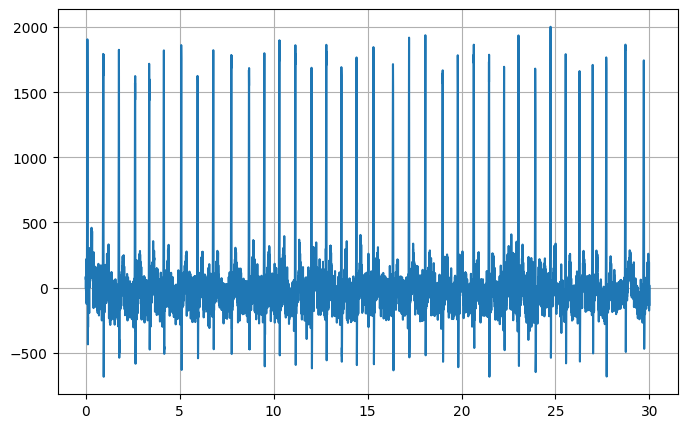

In [11]:
import matplotlib.pyplot as plt
T=1/1024
t=np.arange(0,ECG_filtered.size*T,T)
ECG_filtered = ECG_filtered.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG_filtered)
plt.grid(True)
plt.show()

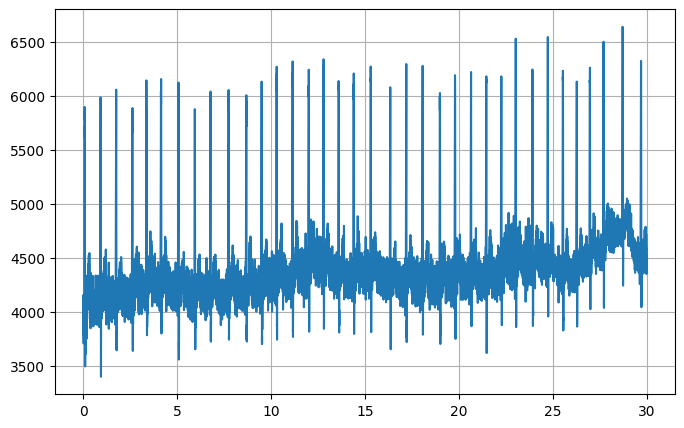

In [12]:
T=1/1024
t=np.arange(0,ECG.size*T,T)
ECG = ECG.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG)
plt.grid(True)
plt.show()

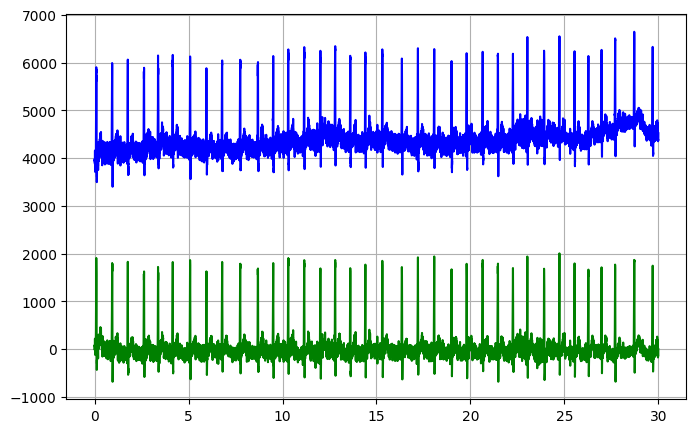

In [13]:
T=1/1024
t=np.arange(0,ECG.size*T,T)
ECG = ECG.flatten()

plt.figure(figsize=(8, 5))
plt.plot(t,ECG, 'b')
plt.plot(t,ECG_filtered,'g')
plt.grid(True)
plt.show()

Se puede apreciar una disminución en la amplitud de la señal filtrada, y se aprecia un poco mejor el complejo intermedio entre picos, tiene mayor definición, probablemente producto del filtrado de una frecuencia de ruido presente en la señal (se requiere análisis de frecuencia para concluir)